In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

img = cv.imread('JohnHancocksSignature.png', cv.IMREAD_UNCHANGED)

if img is None:
    print('Image load failed')
    sys.exit()

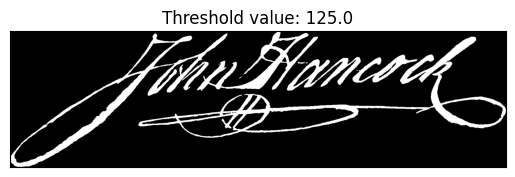

In [5]:
t, bin_img = cv.threshold(img[:,:,3], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray')
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.title(f'Threshold value: {t}')
plt.show()

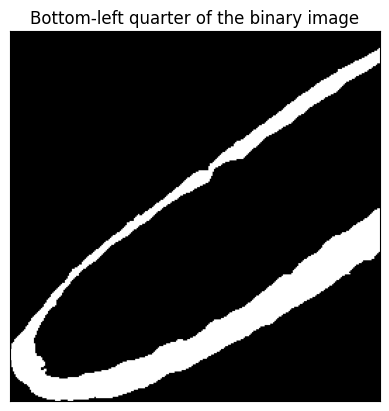

In [6]:
b = bin_img[bin_img.shape[0]//2:bin_img.shape[0], 0:bin_img.shape[0]//2+1]
plt.imshow(b, cmap='gray')
plt.xticks([])  # Hide x-axis ticks
plt.yticks([]) # Hide y-axis ticks
plt.title('Bottom-left quarter of the binary image')
plt.show()


In [7]:
se = np.uint8([[0,0,1,0,0,],
               [0,1,1,1,0],
               [1,1,1,1,1],
               [0,1,1,1,0],
               [0,0,1,0,0]])

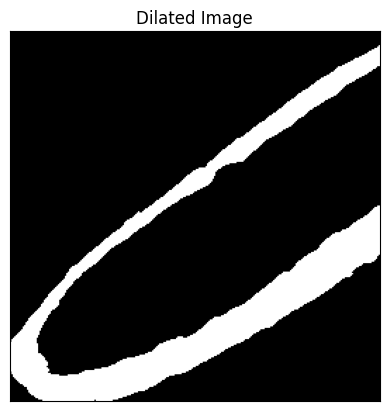

In [8]:
b_dilation = cv.dilate(b, se, iterations=1)
plt.imshow(b_dilation, cmap='gray')
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.title('Dilated Image')
plt.show()

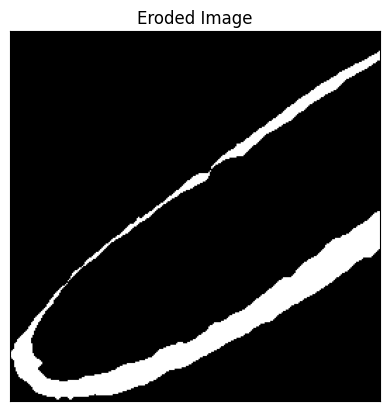

In [9]:
b_erosion = cv.erode(b, se, iterations=1)
plt.imshow(b_erosion, cmap='gray')
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.title('Eroded Image')
plt.show()

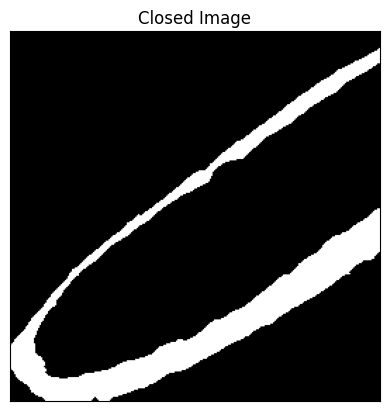

In [10]:
b_closing = cv.morphologyEx(b, cv.MORPH_CLOSE, se)
plt.imshow(b_closing, cmap='gray')
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.title('Closed Image')
plt.show()

| 연산              | 순서      | 목적                          |
| --------------- | ------- | --------------------------- |
| **열림(Opening)** | 침식 ➜ 팽창 | 작은 노이즈 제거하면서 큰 객체는 유지       |
| **닫힘(Closing)** | 팽창 ➜ 침식 | 객체 내부의 작은 구멍 메우기, 끊어진 부분 연결 |